In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_cars = pd.read_csv('./data/car_data.csv')

In [3]:
df_simulations = pd.read_csv('./data/simulation_data.csv')

De dataverzameling ging in twee delen:<br>
- Simulatieparameters: Voor elke simulatie werden waardes van de parameters opgeslagen. (simulatienummer, maximumsnelheid, spawn rate en maximale aantal auto's)
- Agentinformatie: Voor elke auto werd de snelheid op elke tick vastgelegd. (simulatienummer, autonummer, tick, huidige snelheid)

In [4]:
df_cars.head()

,simulation_number,object_id,count,current_speed
0,0,-4432,60,0.00
1,0,-4432,61,0.00
2,0,-4432,62,4.29
3,0,-4432,63,4.29
4,0,-4432,64,4.29


In [5]:
df_simulations.head()

,simulation_number,speed_limit,spawn_rate,max_cars
0,0,3.5,60,10
1,1,3.5,60,20
2,2,3.5,60,40
3,3,3.5,60,60
4,4,3.5,80,10


In [6]:
# Calculate average speed in a simulation based on car data
df_simulations['average_speed'] = df_cars.groupby('simulation_number').mean()['current_speed']

In [7]:
# Calculate percentage used of speed limit based on average speed / speed limit, the lower the number, the bigger the congestion.
df_simulations['percentage_of_speed_limit'] = abs(df_simulations['average_speed'] / df_simulations['speed_limit'])
df_simulations

,simulation_number,speed_limit,spawn_rate,max_cars,average_speed,percentage_of_speed_limit
0,0,3.5,60,10,2.928997,0.836856
1,1,3.5,60,20,2.879408,0.822688
2,2,3.5,60,40,3.203871,0.915392
3,3,3.5,60,60,2.866789,0.819083
4,4,3.5,80,10,3.180589,0.908740
...,...,...,...,...,...,...
59,59,5.0,100,60,3.425072,0.685014
60,60,5.0,120,10,3.688835,0.737767
61,61,5.0,120,20,3.500000,0.700000
62,62,5.0,120,40,3.249479,0.649896


In [8]:
# Drop average speed since it's not needed anymore
df_simulations.drop(columns=['average_speed'], inplace=True)

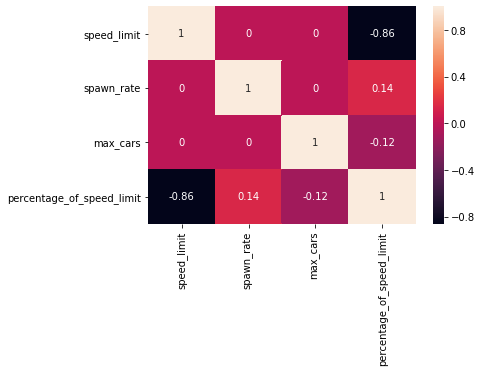

In [9]:
# Create overall correlation matrix
corrMatrix = df_simulations[['speed_limit','spawn_rate','max_cars','percentage_of_speed_limit']].corr()
sn.heatmap(corrMatrix, annot=True)

In bovenstaande correlatiematrix is te zien dat <b>de maximumsnelheid een zeer sterke invloed heeft op het effect van filevorming, hoe hoger de maximumsnelheid, hoe meer filevorming ontstaat.</b> Daarnaast is er een zeer klein effect van de spawn rate en het maximale aantal auto's. Om op de effecten van deze twee factoren in te zoomen kunnen we hier correlatiematrices van maken waarbij de maximumsnelheid buitenwege gelaten wordt.

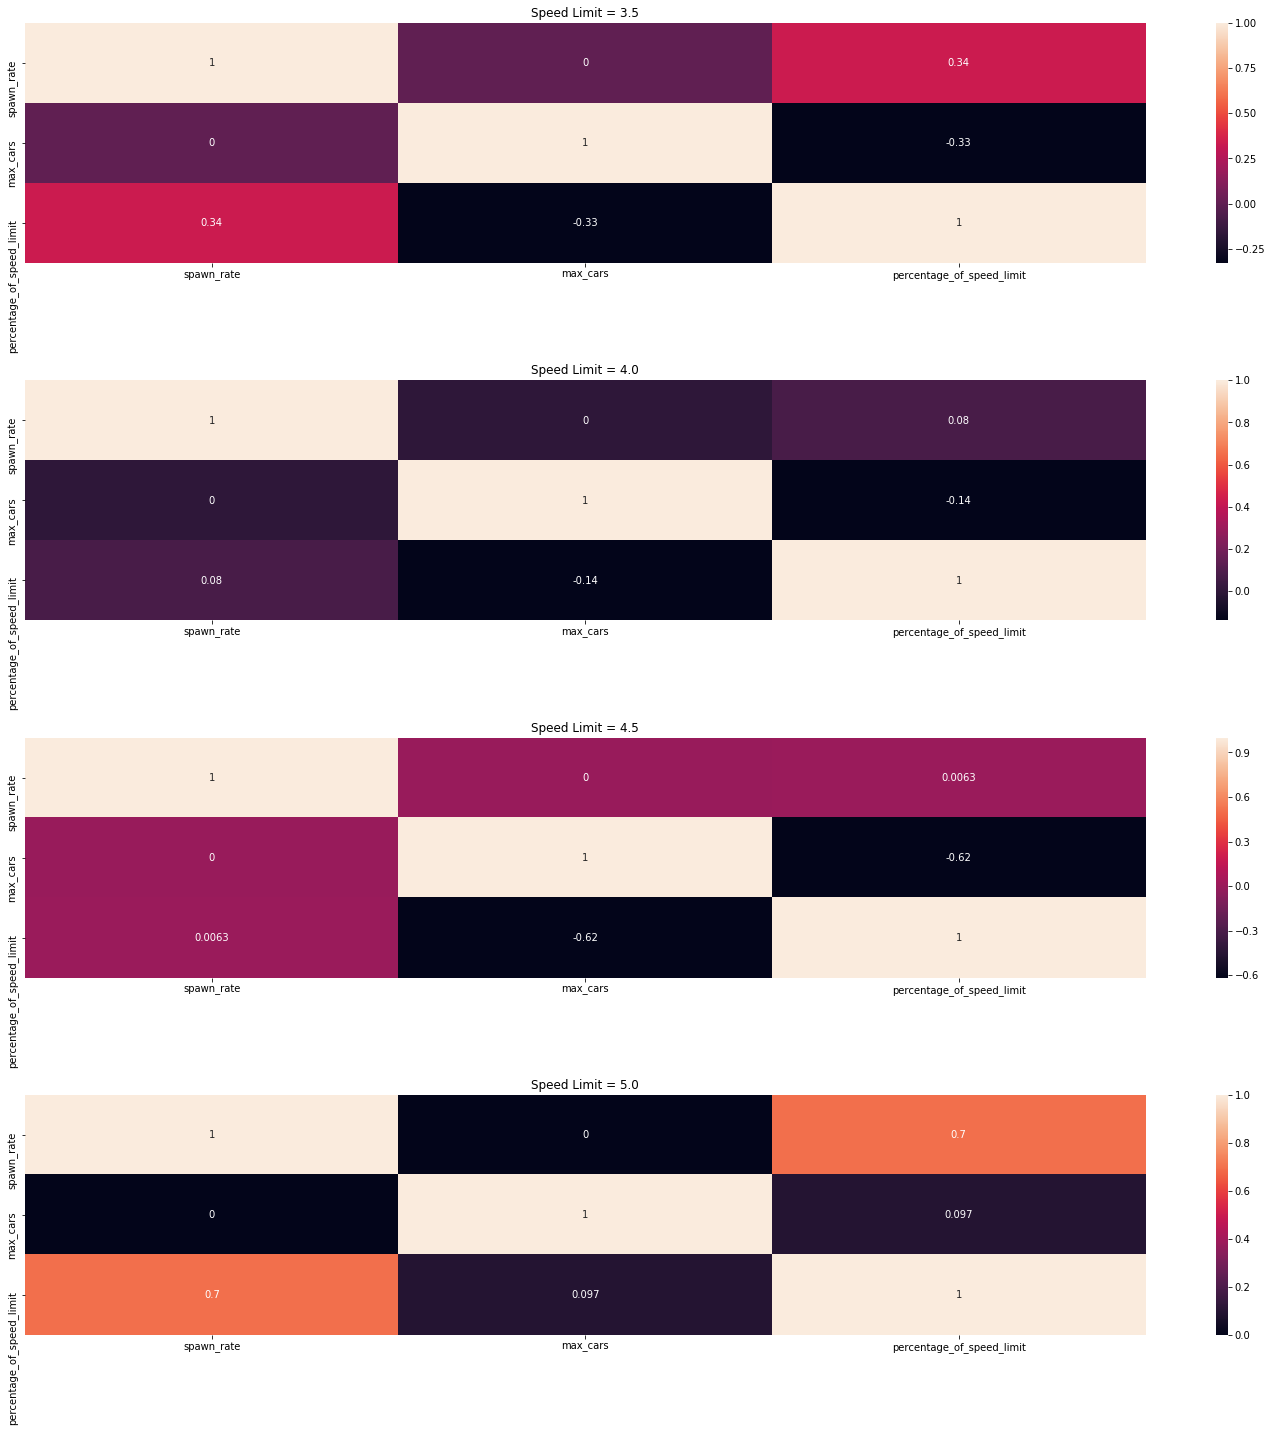

In [10]:
# Create plots
fig, axes = plt.subplots(4,1, figsize=(20,20))

# Fill plots with correlation matrices, 1 per speed limit.
axes_index = 0
for speed_limit in df_simulations['speed_limit'].unique():
    temp_df = df_simulations[df_simulations['speed_limit'] == speed_limit]
    corrMatrix = temp_df[['spawn_rate','max_cars','percentage_of_speed_limit']].corr()
    axes[axes_index].title.set_text(f"Speed Limit = {speed_limit}")
    sn.heatmap(corrMatrix, annot=True, ax=axes[axes_index])
    axes_index += 1
fig.tight_layout()

In bovenstaande correlatiematrices komen de volgende punten naar voren:
- In de correlatiematrix van Speed Limit = 4.5 is een relatief sterke correlate te zien tussen het maximale aantal auto's en de filevorming.
- In de correlatiematrix van Speed Limit = 5.0 is een relatief sterke correlate te zien tussen de spawn rate en de filevorming.

Hieruit kunnen we opmaken dat de andere factoren op dit niveau wel een rol spelen.

In [55]:
fig, axes = plt.subplots(1,4, figsize=(20,12))
plt.close(fig)

In [56]:
x_index = 0
for spawn_rate in df_simulations['spawn_rate'].unique():
    y_index = 0
    for max_cars in df_simulations['max_cars'].unique():
        temp_df = df_simulations[(df_simulations['spawn_rate'] == spawn_rate) & (df_simulations['max_cars'] == max_cars)]
        temp_df.plot(x='speed_limit', y='percentage_of_speed_limit', title=f"Spawn Rate = {spawn_rate}", label=f"Max Cars = {max_cars}", ylim=(0.5,1.1), ax=axes[x_index])
        y_index +=1
    x_index +=1

In [57]:
fig.tight_layout()

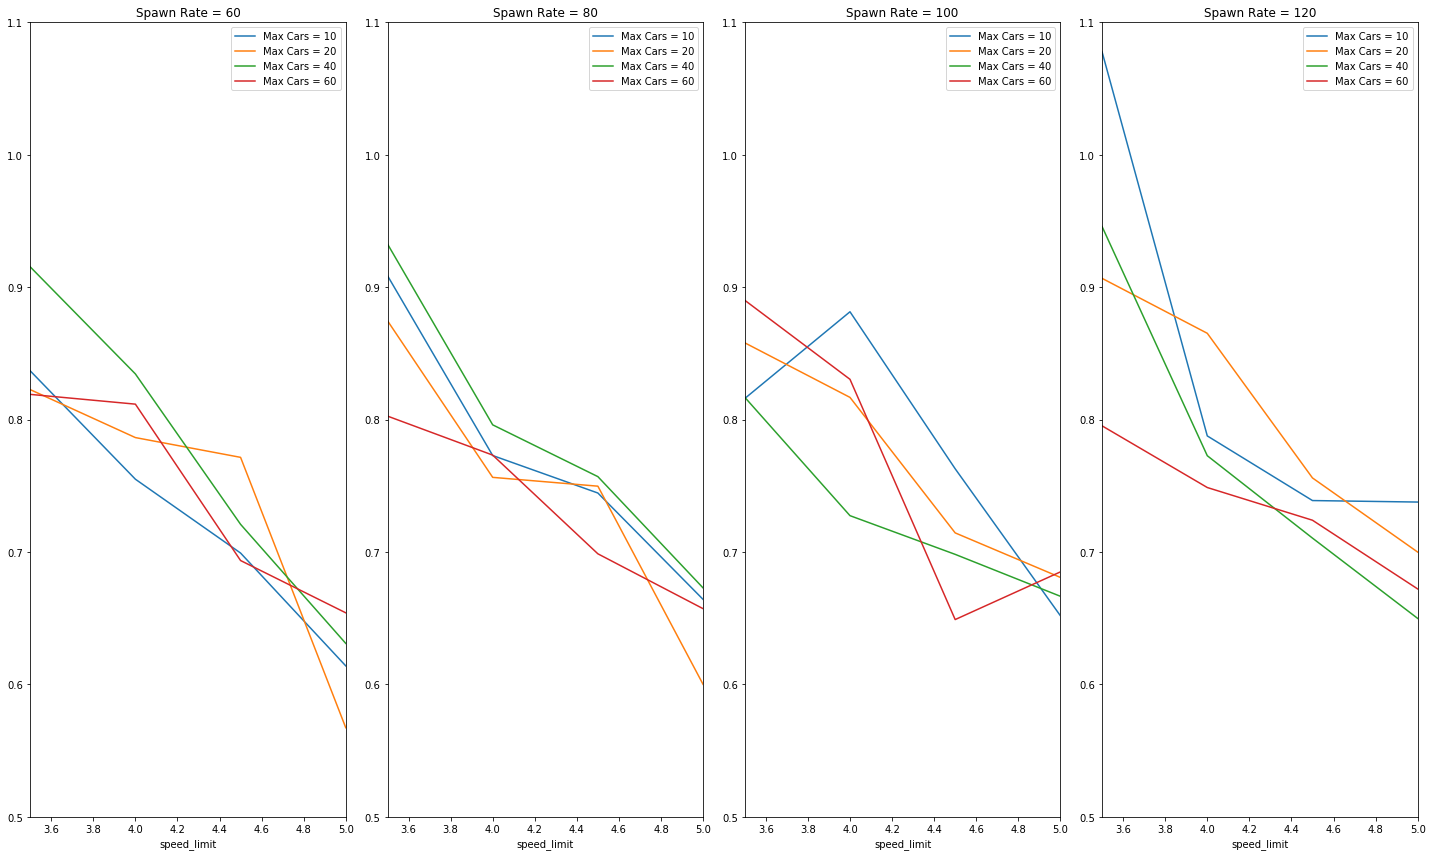

In [58]:
fig

Bovenstaande grafieken geven een beeld van de verbanden tussen de variabelen spawn rate (per grafiek), maximale aantal auto's (lijn), de maximumsnelheid (x-as) en de filevorming (y-as, hoe lager, hoe meer filevorming).

Hieruit blijkt weer een sterkte correlatie tussen de maximumsnelheid en de filevorming, de gemiddelde snelheden relatief aan de maximumsnelheid gaan namelijk omlaag, wanneer de maximumsnelheid hoger wordt.